# Importando todas as bibliotecas necessárias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Analisando o grupo de dados ensino: <a href="http://dados.ufrn.br/group/ensino" traget="_black">http://dados.ufrn.br/group/ensino</a>

In [52]:
# docentes da UFRN - http://dados.ufrn.br/dataset/docentes
#docentes_url = 'http://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070/download/docentes.csv'
docentes_url = 'dados/docentes.csv'
docentes = pd.read_csv(docentes_url, sep=';')

# avaliacoes dos docentes da UFRN - http://dados.ufrn.br/dataset/avaliacoes-de-docencia
#avaliacoes_url = 'http://dados.ufrn.br/dataset/d5723d75-7e6e-4264-82aa-b96909b69f63/resource/7accd1d2-2793-460e-b98d-87a0679b9155/download/avaliacaodocencia.csv'
avaliacoes_url = 'dados/avaliacaodocencia.csv'
avaliacoes = pd.read_csv(avaliacoes_url, sep=';')

# matrículas em componentes - http://dados.ufrn.br/dataset/matriculas-componentes

# matrículas em componentes em 2017.1
#notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171'
notas_url = 'dados/matricula-componente-20171'
notas = pd.read_csv(notas_url, sep=';')

# matrículas em componentes em 2016.2
notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv'
notas = pd.concat([notas, pd.read_csv(notas_url, sep=';')])

# matrículas em componentes em 2016.1
notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4778d3ce-8898-46a8-a623-ee6a480a2980/download/matriculas-de-2016.1.csv'
notas = pd.concat([notas, pd.read_csv(notas_url, sep=';')])

# Preparação e Limpeza dos Dados

In [54]:
# removendo notas nulas ou repitidas
notas = notas[notas.media_final.notnull()]
notas = notas[~notas[['discente','id_turma']].duplicated()]

# removendo discentes(matriculas) que não realizam avaliações
notas = notas[notas.descricao != 'CANCELADO']
notas = notas[notas.descricao != 'CUMPRIU']
notas = notas[notas.descricao != 'DISPENSADO']
notas = notas[notas.descricao != 'DESISTENCIA']
notas = notas[notas.descricao != 'MATRICULADO']
notas = notas[notas.descricao != 'TRANCADO']
notas = notas[notas.descricao != 'EXCLUIDA']

# unificando em aprovados e reprovados
notas.loc[notas.descricao == 'APROVADO POR NOTA', 'descricao'] = 'APROVADO'
notas.loc[notas.descricao == 'REPROVADO POR MÉDIA E POR FALTAS', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR NOTA E FALTA', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR NOTA', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR FALTAS', 'descricao'] = 'REPROVADO'

notas

,Unnamed: 10,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
0,NaN,APROVADO,880d7ee5080d3b969bf45556f95ac6b4,0.0,2000057.0,57597218,8.9,8.7,0.0,f,1.0
3,NaN,APROVADO,07feb1dc40e26ad43ecb18608f102c49,0.0,2000057.0,57597218,9.0,8.1,0.0,f,1.0
6,NaN,REPROVADO,4b7f3472e6cb49c22d608494a87e3743,0.0,2000057.0,57597218,0.0,0.0,0.0,f,3.0
9,NaN,APROVADO,bdc55e5eb26a7b26d8b9a9351a006581,0.0,2000057.0,57597218,9.6,10.0,0.0,f,3.0
13,NaN,APROVADO,b83369657a8d12b026bb0d50b51842c6,0.0,2000057.0,57597218,9.5,8.5,0.0,f,1.0
16,NaN,APROVADO,fd1dadf10ed2f78de12d678d140b7af0,0.0,2000057.0,57597218,6.8,5.5,0.0,f,3.0
19,NaN,APROVADO,71ae21e953148a06a413cb9aabf34512,0.0,2000057.0,57597218,9.8,10.0,0.0,f,3.0
22,NaN,REPROVADO,bffb4eb3d59998051e0c91068f5d46a1,0.0,2000057.0,57597218,2.0,0.0,0.0,f,3.0
25,NaN,APROVADO,966161ee6290ca765610b2047fb650d0,0.0,111635069.0,57597218,8.4,8.3,0.0,f,2.0
28,NaN,APROVADO,cd0227358f5de2f2a1deaad1ca93d238,0.0,2000057.0,57597218,7.0,7.0,0.0,f,3.0


In [55]:
# limitando avaliações de docentes do IMD
avaliacoes = avaliacoes[avaliacoes.id_docente.isin(docentes[docentes.lotacao == 'INSTITUTO METROPOLE DIGITAL'].id_servidor)]

# limitando avaliações para 2016.1 até 2017.1
avaliacoes = avaliacoes[avaliacoes.ano > 2015]

avaliacoes

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP
13892,25889,LOURENA KARIN DE MEDEIROS ROCHA,57576568,2016,1,48,9.38,1.37,8.62,2.31,8.29,2.58
13893,25889,LOURENA KARIN DE MEDEIROS ROCHA,57586215,2016,2,46,9.23,1.30,8.56,2.13,8.09,2.49
13894,25889,LOURENA KARIN DE MEDEIROS ROCHA,57586397,2016,2,50,9.53,0.84,8.96,1.99,8.42,2.08
35236,5754613,FREDERICO ARAUJO DA SILVA LOPES,57597049,2017,1,27,9.70,0.66,9.48,1.22,8.66,1.80
36574,5755108,CARLOS EDUARDO DA SILVA,57597962,2017,1,31,9.87,0.35,9.03,1.79,8.87,1.90
36575,5755108,CARLOS EDUARDO DA SILVA,57598004,2017,1,20,9.70,0.80,8.63,2.17,8.77,1.84
36939,5755274,BRUNO SANTANA DA SILVA,57576787,2016,1,25,9.97,0.18,9.31,1.55,8.98,1.56
36940,5755274,BRUNO SANTANA DA SILVA,57576789,2016,1,14,9.88,0.34,8.44,2.28,8.04,2.09
36941,5755274,BRUNO SANTANA DA SILVA,57587415,2016,2,13,10.00,0.00,9.57,0.91,9.06,1.65
36942,5755274,BRUNO SANTANA DA SILVA,57598066,2017,1,35,10.00,0.00,9.32,1.58,8.52,1.78


## Calcular dados das avaliações dos professores

In [56]:
# criando as colunas e gerando seus valores
avaliacoes['media_discentes'] = 0
avaliacoes['nota_min'] = 0
avaliacoes['nota_max'] = 0
avaliacoes['nota_med'] = 0
avaliacoes['percentual_aprovados'] = 0

for turma in avaliacoes.id_turma:
    discentes = notas[notas.id_turma == turma]
    if(len(discentes) > 0):
        avaliacoes.loc[avaliacoes.id_turma == turma,'media_discentes'] = discentes.media_final.sum() / len(discentes)
        avaliacoes.loc[avaliacoes.id_turma == turma,'nota_min'] = discentes.media_final.min()
        avaliacoes.loc[avaliacoes.id_turma == turma,'nota_max'] = discentes.media_final.max()
        avaliacoes.loc[avaliacoes.id_turma == turma,'nota_med'] = discentes.media_final.median()
        avaliacoes.loc[avaliacoes.id_turma == turma,
                       'percentual_aprovados'] = len(discentes[discentes.descricao == 'APROVADO']) * 100 / len(discentes)

avaliacoes

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP,media_discentes,nota_min,nota_max,nota_med,percentual_aprovados
13892,25889,LOURENA KARIN DE MEDEIROS ROCHA,57576568,2016,1,48,9.38,1.37,8.62,2.31,8.29,2.58,0.000000,0.0,0.0,0.00,0.000000
13893,25889,LOURENA KARIN DE MEDEIROS ROCHA,57586215,2016,2,46,9.23,1.30,8.56,2.13,8.09,2.49,2.402174,0.0,8.2,1.80,21.739130
13894,25889,LOURENA KARIN DE MEDEIROS ROCHA,57586397,2016,2,50,9.53,0.84,8.96,1.99,8.42,2.08,2.798000,0.0,9.5,1.85,30.000000
35236,5754613,FREDERICO ARAUJO DA SILVA LOPES,57597049,2017,1,27,9.70,0.66,9.48,1.22,8.66,1.80,7.911111,5.4,9.7,8.30,100.000000
36574,5755108,CARLOS EDUARDO DA SILVA,57597962,2017,1,31,9.87,0.35,9.03,1.79,8.87,1.90,4.948387,0.0,7.9,5.30,77.419355
36575,5755108,CARLOS EDUARDO DA SILVA,57598004,2017,1,20,9.70,0.80,8.63,2.17,8.77,1.84,6.280000,1.1,9.0,6.75,90.000000
36939,5755274,BRUNO SANTANA DA SILVA,57576787,2016,1,25,9.97,0.18,9.31,1.55,8.98,1.56,0.000000,0.0,0.0,0.00,0.000000
36940,5755274,BRUNO SANTANA DA SILVA,57576789,2016,1,14,9.88,0.34,8.44,2.28,8.04,2.09,0.000000,0.0,0.0,0.00,0.000000
36941,5755274,BRUNO SANTANA DA SILVA,57587415,2016,2,13,10.00,0.00,9.57,0.91,9.06,1.65,6.353846,0.0,10.0,6.50,84.615385
36942,5755274,BRUNO SANTANA DA SILVA,57598066,2017,1,35,10.00,0.00,9.32,1.58,8.52,1.78,5.080000,0.3,10.0,5.40,54.285714


## Análise Grafica dos dados

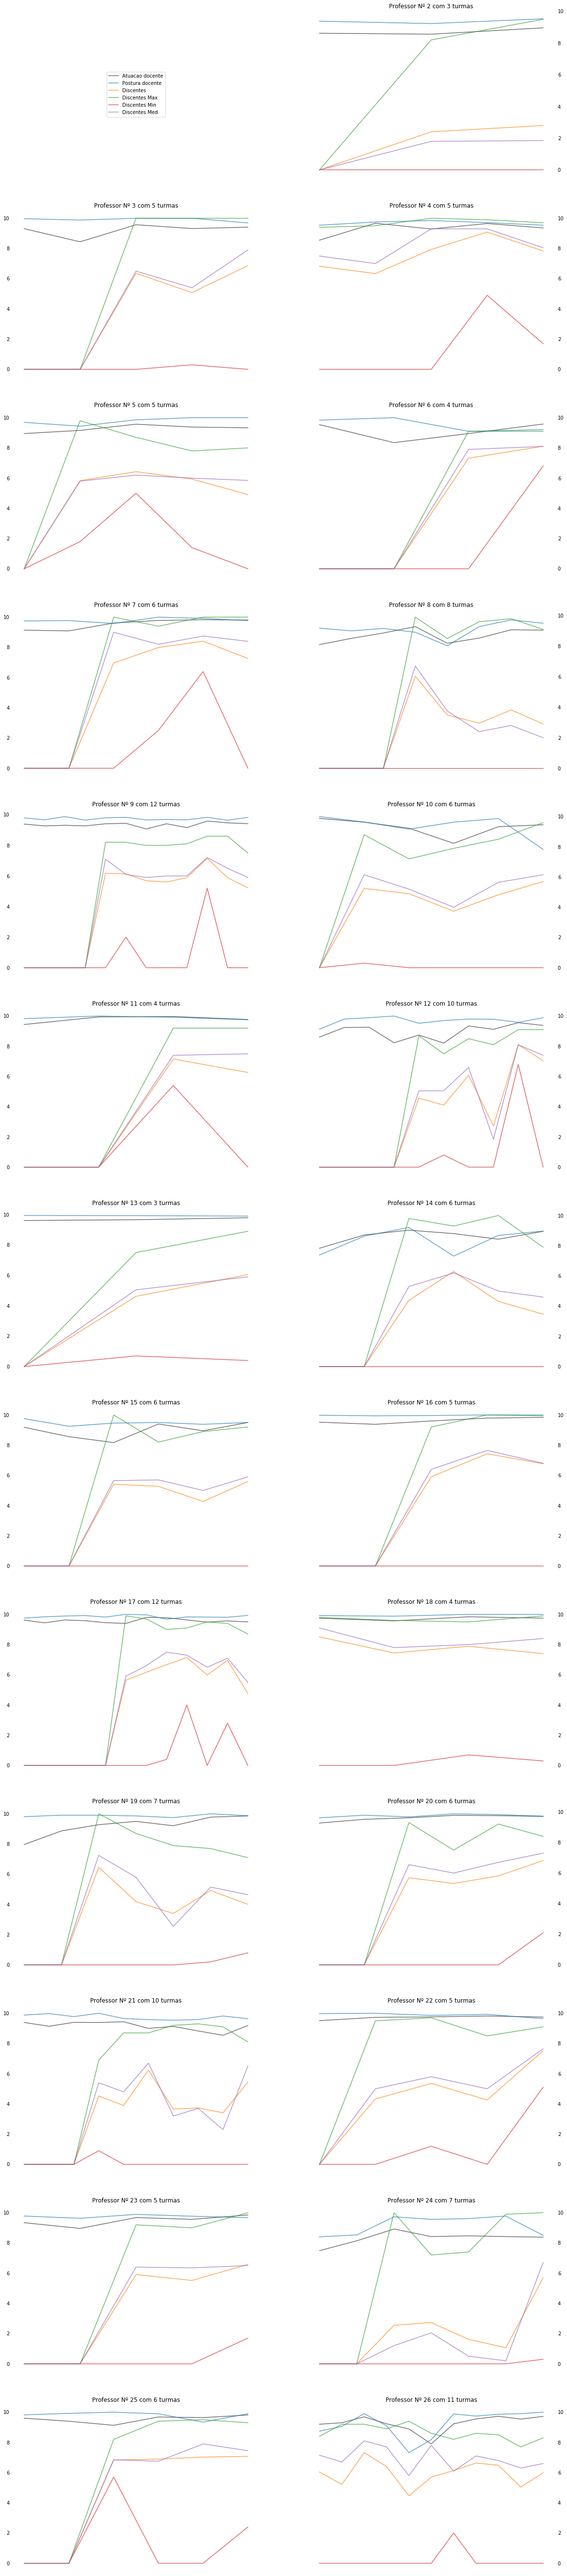

In [58]:
fig = plt.figure(figsize=(20, 150))
ax = fig.add_subplot(20, 2, 1)
ax.plot([], [], alpha=0.7, label='Atuacao docente', color='#333333')
ax.plot([], [], alpha=0.7, label='Postura docente')
ax.plot([], [], alpha=0.7, label='Discentes')
ax.plot([], [], alpha=0.7, label='Discentes Max')
ax.plot([], [], alpha=0.7, label='Discentes Min')
ax.plot([], [], alpha=0.7, label='Discentes Med')
ax.legend(loc='center')
ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
for d in ['top','bottom','left','right']:
    ax.spines[d].set_visible(False)

i = 1
for docente in avaliacoes.id_docente.unique():
    a = avaliacoes[avaliacoes.id_docente == docente]
    x = range(len(a))
    if(len(x) < 3):
        continue
    i += 1
    ax = fig.add_subplot(20, 2, i)
    ax.plot(x, a.atuacao_profissional_media, alpha=0.7, color='#333333')
    ax.plot(x, a.postura_profissional_media, alpha=0.7)
    ax.plot(x, a.media_discentes, alpha=0.7)
    ax.plot(x, a.nota_max, alpha=0.7)
    ax.plot(x, a.nota_min, alpha=0.7)
    ax.plot(x, a.nota_med, alpha=0.7)

    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=i%2, labelright=~i%2)
    ax.set_title(f'Professor Nº {i} com {len(x)} turmas')
    #ax.xlabel('Turmas')
    #ax.ylabel('Nota')
    for d in ['top','bottom','left','right']:
        ax.spines[d].set_visible(False)

plt.show()